<h1 style="border: thick double #32a1ce; text-align:center;box-shadow: 12px 12px 2px 1px rgba(0, 0, 255, .2);border-radius:35px">
TP Machine learning : Segmentation des clients d'un site ECOM
</h1>

<h1 style="border: thick double #32a1ce; text-align:center;box-shadow: 12px 12px 2px 1px rgba(0, 0, 255, .2);border-radius:35px">
Chargement des librairies
</h1>

In [1]:
# Librairies standards 
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import radians, cos, sin, asin, sqrt

C:\Users\Cifope 254\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\Cifope 254\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


<h1 style="border: thick double #32a1ce; text-align:center;box-shadow: 12px 12px 2px 1px rgba(0, 0, 255, .2);border-radius:35px">
1. Description des données
</h1>

<h2 style="border: thick double #32a1ce; text-align:center;box-shadow: 12px 12px 2px 1px rgba(0, 0, 255, .2);border-radius:35px">
1.1 Chargement des données
</h2>

### a. Les clients

In [2]:
data_dir = 'C:/Users/Cifope 254/Downloads/ml_2/data/'
# Chargement de la base olist_customers_dataset
customers = pd.read_csv(data_dir + 'olist_customers_dataset.csv')
customers.head(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


NB : Le dataset ne comporte pas de valeurs nulles.

### b. Les données de géolocalisation

In [4]:
# Chargement de la base olist_geolocation_dataset
geolocation = pd.read_csv(data_dir + "olist_geolocation_dataset.csv")
geolocation.head(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [5]:
geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


NB :
* Pas de valeurs nulles;
* **Lien avec la base customers : la clé geolocation_zip_code_prefix**;

In [6]:
geolocation.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


### c. Les commandes clients

In [7]:
# olist_orders_dataset
orders = pd.read_csv(data_dir + "olist_orders_dataset.csv")
orders.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


NB :
 - Lien avec la base clients : **Les observations sont rattachées à un client par le customer_id.**

In [8]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


### d. Les articles

In [9]:
# Chargement de la base olist_order_items_dataset
order_items = pd.read_csv(data_dir + "olist_order_items_dataset.csv")
order_items.head(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [10]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


### e. Les paiements

In [11]:
order_payments = pd.read_csv(data_dir + "olist_order_payments_dataset.csv")
order_payments.head(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [12]:
order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


### f. Avis des clients (Notes - Commentaires)

In [13]:
# Chargement de la base olist_order_reviews_dataset
order_reviews = pd.read_csv(data_dir + "olist_order_reviews_dataset.csv")
order_reviews.head(5)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [14]:
order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


### g. Les produits

In [15]:
# Chargement de la base olist_products_dataset
products = pd.read_csv(data_dir + "olist_products_dataset.csv")
products.head(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [16]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


### h. Les vendeurs

In [17]:
# olist_sellers_dataset
sellers =   pd.read_csv(data_dir + "olist_sellers_dataset.csv")
sellers.head(5)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [18]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


### i. Categories traduites

In [19]:
# Chargement de la base olist_product_category_name_translation_dataset
categories_en = pd.read_csv(data_dir + "product_category_name_translation.csv")
categories_en.head(5)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [20]:
categories_en.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


NB :
* Les catégories traduites et les produits sont liés par la variable product_category_name.

Les vendeurs n'étant pas l'objet de cette analyse, le dataset correspondant (sellers) sera ici ignoré.

<h2 style="border: thick double #32a1ce; text-align:center;box-shadow: 12px 12px 2px 1px rgba(0, 0, 255, .2);border-radius:35px">
1.2 Fusion des bases de données
</h2>

### Jointure de Produits et Catégories

In [21]:
products = pd.merge(products, categories_en,
                    how="left",
                    on="product_category_name")

drop_list = ["product_category_name", "product_weight_g",
                     "product_length_cm", "product_height_cm",
                     "product_width_cm"]
products.drop(drop_list, axis=1, inplace=True)
products = products.rename(columns={"product_category_name_english":
                                    "product_category_name"})
products.head(6)

,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,40.0,287.0,1.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,44.0,276.0,1.0,art
2,96bd76ec8810374ed1b65e291975717f,46.0,250.0,1.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,27.0,261.0,1.0,baby
4,9dc1a7de274444849c219cff195d0b71,37.0,402.0,4.0,housewares
5,41d3672d4792049fa1779bb35283ed13,60.0,745.0,1.0,musical_instruments


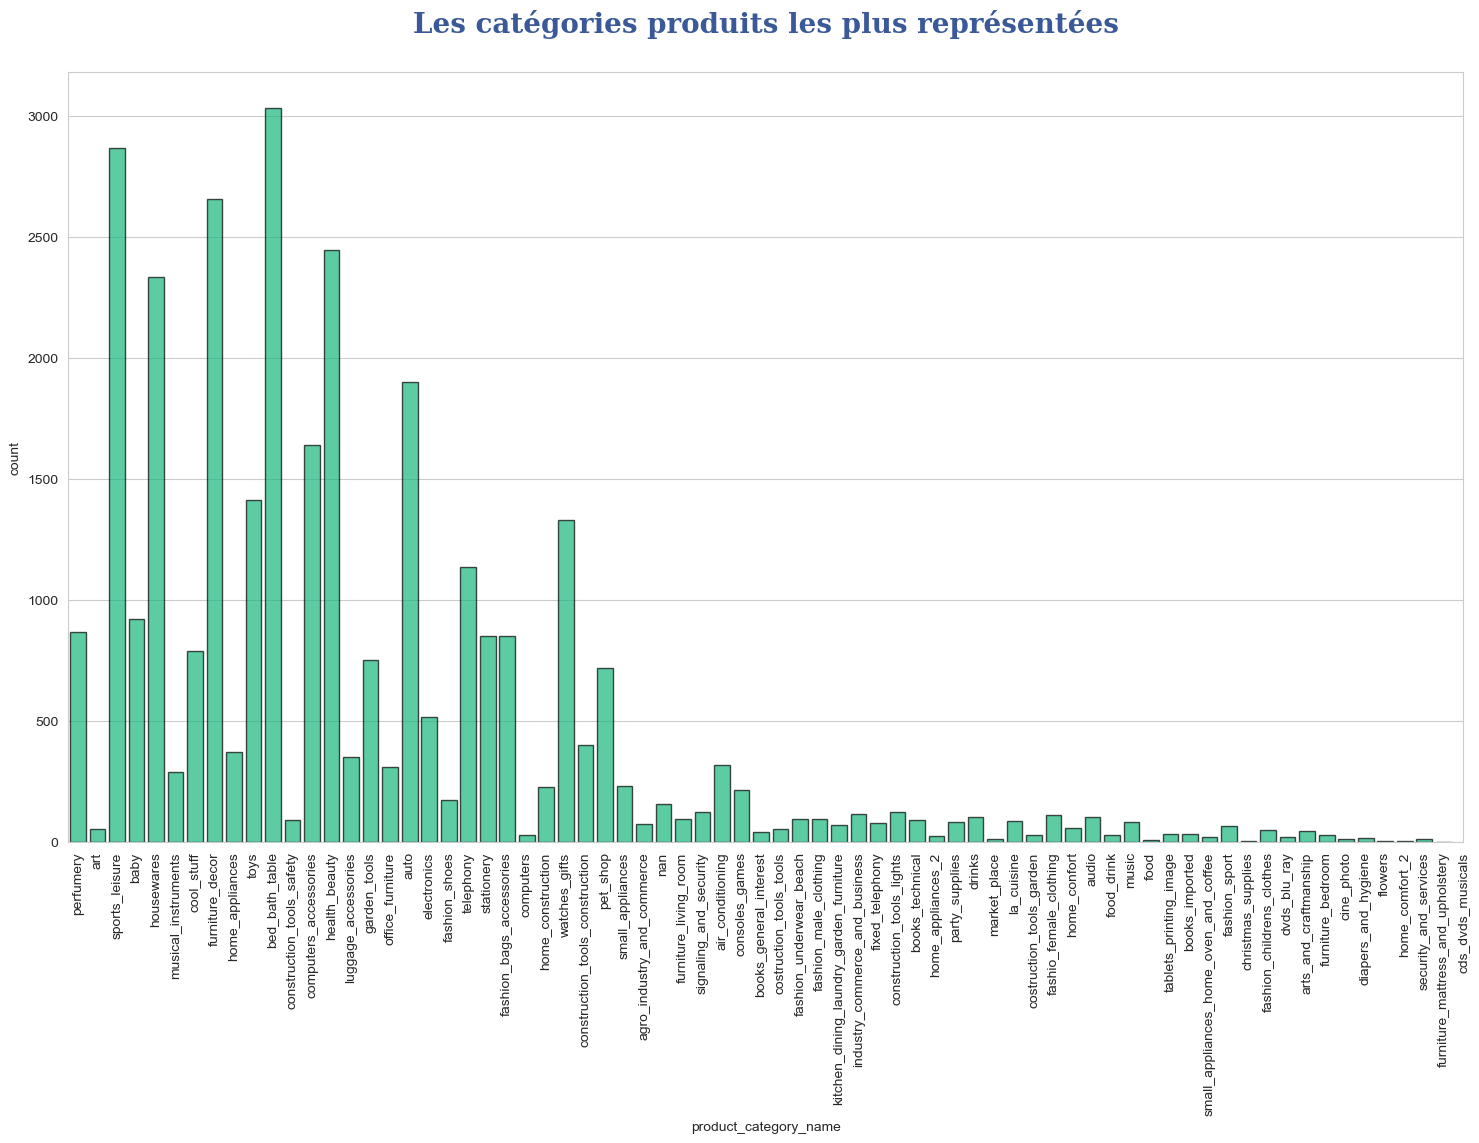

In [22]:
# Visualisation de la répartition des diverses catégories de produit
sns.set_style("whitegrid")
font_title = {
    "family": "serif",
    "color":  "#3b5998",
    "weight": "bold",
    "size": 20  
}

fig = plt.figure(figsize=(18, 10))
sns.countplot(data=products, x="product_category_name",
              edgecolor="black",
              color="#00d184", alpha=0.7)
plt.xticks(range(0, products["product_category_name"].nunique()+1),
           products["product_category_name"].unique(),
           rotation=90)
plt.title(f"Les catégories produits les plus représentées\n",
          fontdict=font_title)
plt.show()

### Jointure de Commandes et clients

In [23]:
order_items = pd.merge(order_items, orders,
                       how="left",
                       on="order_id")

drop_list = ["seller_id", "shipping_limit_date",
                     "order_approved_at",
                     "order_delivered_carrier_date",
                     "order_estimated_delivery_date"]
order_items.drop(drop_list,
                 axis=1,
                 inplace=True)
order_items.head(5)

,order_id,order_item_id,product_id,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-05-12 16:04:24
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-22 13:19:16
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-14 13:32:39
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-03-01 16:42:31


In [24]:
# Analysons les statuts de commande
order_items.groupby(by="order_status").sum()["order_item_id"]

order_status
approved            4
canceled          704
delivered      132036
invoiced          435
processing        455
shipped          1294
unavailable         8
Name: order_item_id, dtype: int64

In [25]:
# Nous conserverons les observations de type "delivered"
order_items = order_items[order_items["order_status"] == "delivered"]

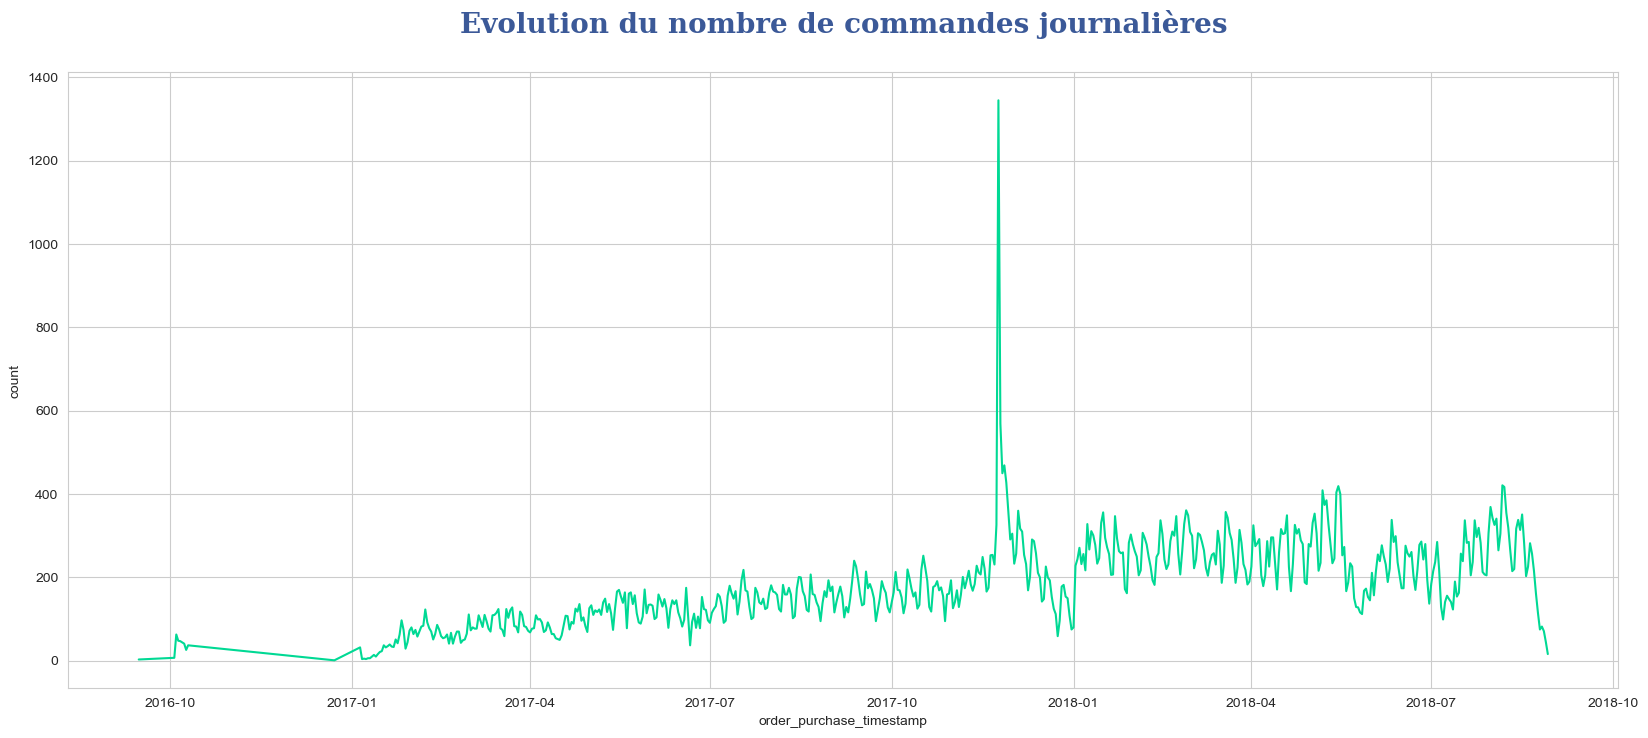

In [26]:
# Evolution du nombre de commandes passées par jour sur le site E-Commerce
orders_per_days = order_items.groupby(order_items["order_purchase_timestamp"]\
                                      .astype('datetime64[ns]').dt.date)\
                                    .count()["order_id"]
fig = plt.figure(figsize=(20, 8))
ax = orders_per_days.plot(color="#00d994")
ax.set_ylabel("count")
plt.title(f"Evolution du nombre de commandes journalières\n",
          fontdict=font_title)
plt.show()

Commentaires :

On remarque un pic anormal autour de Novembre / Décembre 2017 (ce qui peut être un pic correspondant aux cadeaux de fin d'année) ainsi qu'un plateau sans commandes entre Octobre 2016 et Janvier 2017.

In [27]:
# Modifier les types de données en datetime pour les colonnes temporelles.
datetime_cols = ["order_purchase_timestamp", "order_delivered_customer_date"]
for col in datetime_cols:
    order_items[col] = order_items[col].astype('datetime64[ns]')
order_items.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110197 entries, 0 to 112649
Data columns (total 9 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       110197 non-null  object        
 1   order_item_id                  110197 non-null  int64         
 2   product_id                     110197 non-null  object        
 3   price                          110197 non-null  float64       
 4   freight_value                  110197 non-null  float64       
 5   customer_id                    110197 non-null  object        
 6   order_status                   110197 non-null  object        
 7   order_purchase_timestamp       110197 non-null  datetime64[ns]
 8   order_delivered_customer_date  110189 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(1), object(4)
memory usage: 8.4+ MB


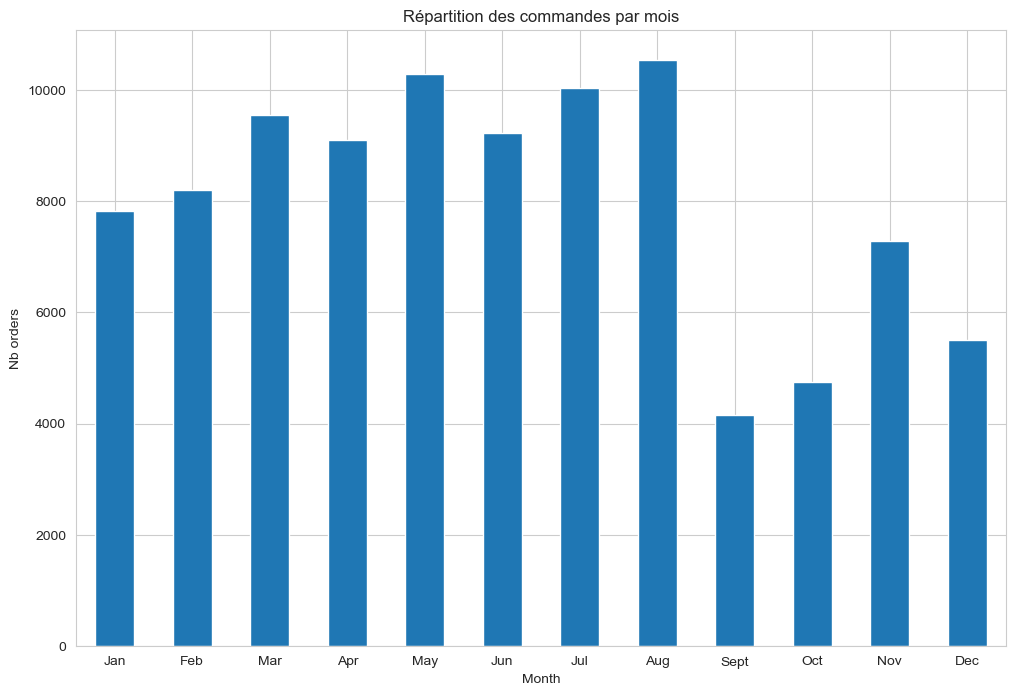

In [28]:
# Repartition des commandes par mois
order_items.groupby(order_items['order_purchase_timestamp'].dt.month)\
    .agg({"order_id": "nunique"})\
    .plot(figsize=(12,8), kind="bar",
          title="Répartition des commandes par mois",
          ylabel="Nb orders",
          xlabel="Month",
          legend=False)
plt.xticks(np.arange(0,12), ['Jan','Feb','Mar','Apr','May','Jun',
                             'Jul','Aug','Sept','Oct','Nov','Dec'], 
           rotation='horizontal')
plt.show()

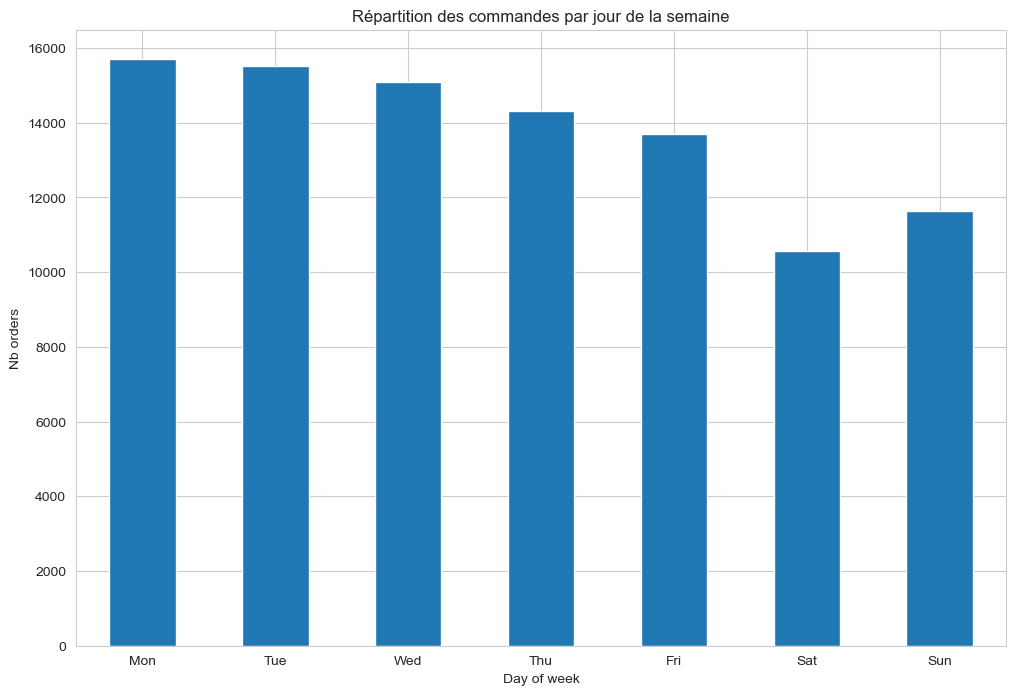

In [29]:
# Repartition des commandes par jour
order_items.groupby(order_items['order_purchase_timestamp'].dt.dayofweek)\
    .agg({"order_id": "nunique"})\
    .plot(figsize=(12,8), kind="bar",
          title="Répartition des commandes par jour de la semaine",
          ylabel="Nb orders",
          xlabel="Day of week",
          legend=False)
plt.xticks(np.arange(0,7), ['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], rotation='horizontal')
plt.show()

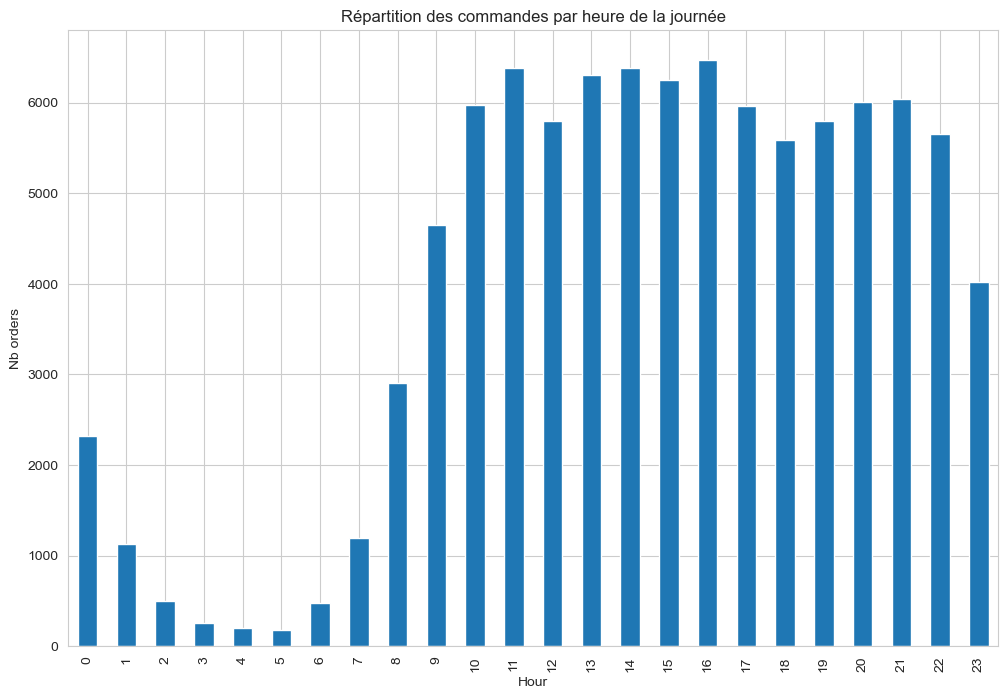

In [30]:
order_items.groupby(order_items['order_purchase_timestamp'].dt.hour)\
    .agg({"order_id": "nunique"})\
    .plot(figsize=(12,8), kind="bar",
          title="Répartition des commandes par heure de la journée",
          ylabel="Nb orders",
          xlabel="Hour",
          legend=False)
plt.show()

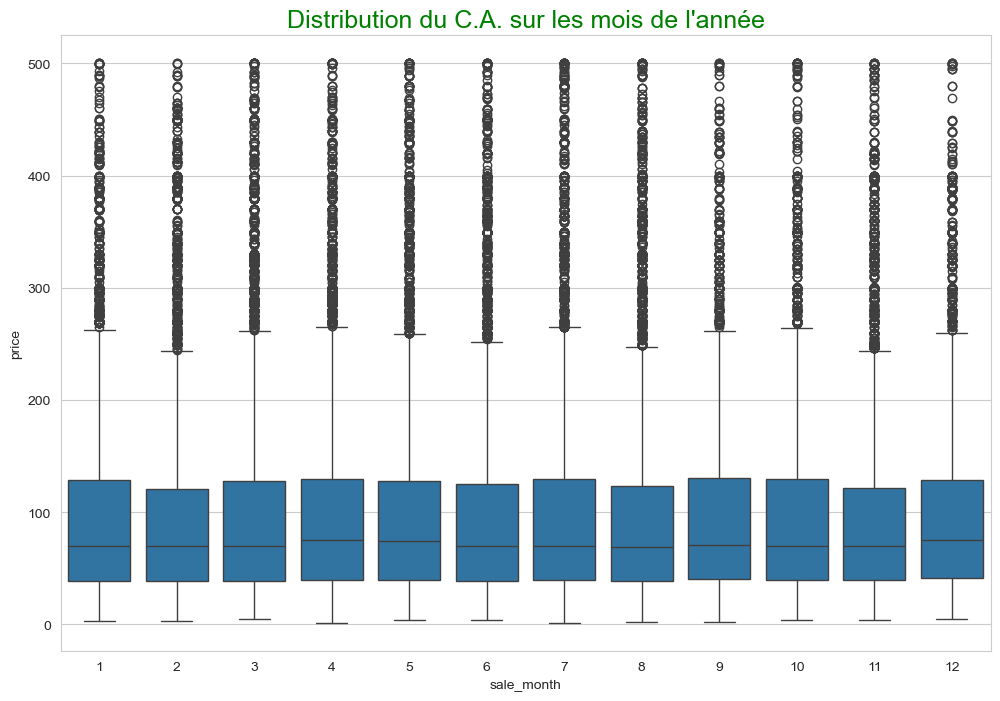

In [33]:
# Analyse de la variabilité du Chiffre d'Affaires sur les mois de l'année
order_items["sale_month"] = order_items['order_purchase_timestamp'].dt.month
fig = plt.figure(figsize=(12,8))
sns.boxplot(data=order_items[order_items.price < 500], x="sale_month", y="price")
plt.title("Distribution du C.A. sur les mois de l'année", fontsize=18, color="b")
plt.show()

**Commentaires**    
Les médianes et variances restent très proches sur les différents mois de l'année.

### Jointure avec la base paiements

Nous allons joindre la base paiements avec la base avec la base order_items. La base oder_items est la jointure de commandes et clients.
Pour le dataset des paiements, vous allons d'abord créer de nouvelles variables à savoir :
* Le nombre de moyens de paiement différents utilisés sur la commande.
* Le nombre d'échéances totales de la commande.

In [34]:
# Creation des variables en regroupant les donnees selon order_id
group_payments = order_payments.groupby(by="order_id").agg(
    {"payment_sequential": 'count',
     "payment_installments": 'sum'})
# Fusion avec order_items
order_items = pd.merge(order_items, group_payments,
                       how="left",
                       on="order_id")
order_items = order_items.rename(columns={
    "payment_sequential": "nb_payment_sequential",
    "payment_installments": "sum_payment_installments"})
order_items.head(5)

,order_id,order_item_id,product_id,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,sale_month,nb_payment_sequential,sum_payment_installments
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48,9,1.0,2.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-05-12 16:04:24,4,1.0,3.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-22 13:19:16,1,1.0,5.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-14 13:32:39,8,1.0,2.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-03-01 16:42:31,2,1.0,3.0


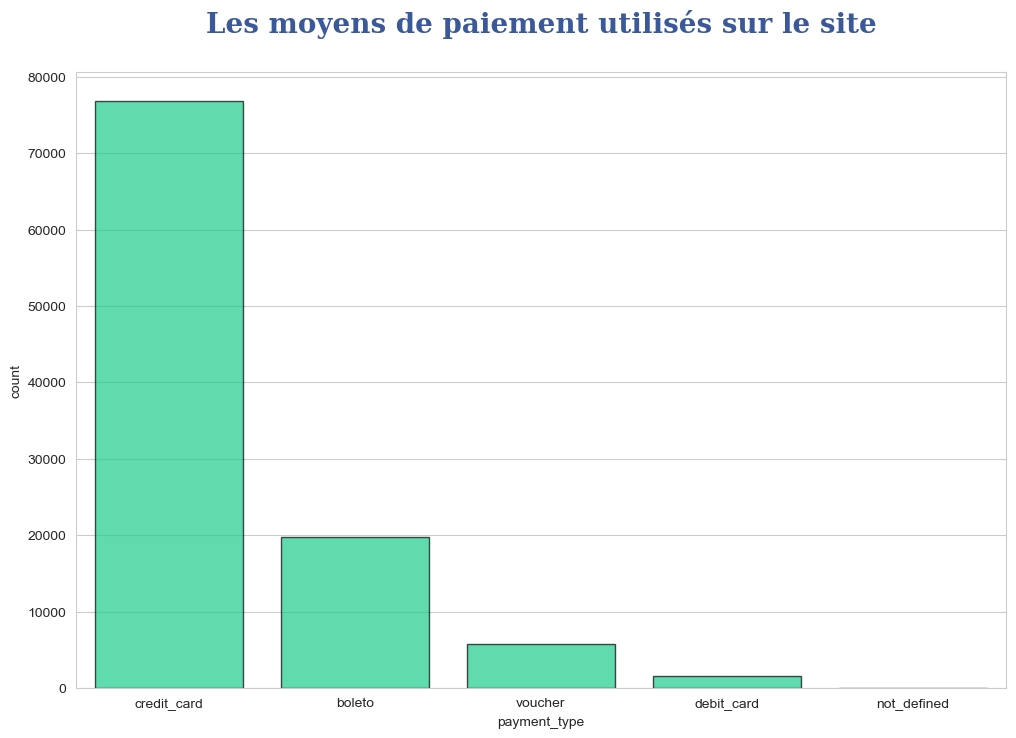

In [35]:
# Repartition des moyens de paiements utilisés sur le site
fig = plt.figure(figsize=(12, 8))
sns.countplot(data=order_payments, x="payment_type",
              edgecolor="black",
              color="#00e994", alpha=0.7)
plt.title(f"Les moyens de paiement utilisés sur le site\n",
          fontdict=font_title)
plt.show()

**Commentaires :**  
On remarque que 80% des paiements environ sont réalisés en carte bancaire. Nous ne prendrons donc pas en considération cette variable dans nos explorations.

### Jointure de la base des avis clients à la base oder_items

nous allons également créer une nouvelle variable qui indiquera seulement si oui ou non la commande a été notée (True or False) et une seconde variable qui reprendra la note attribuée.

In [36]:
# Création des variables en regroupant selon order_id
group_reviews = order_reviews.groupby("order_id").agg({
    "review_id": "count",
    "review_score": "mean"})
# Fusion
order_items = pd.merge(order_items, group_reviews,
                       how="left",
                       on="order_id")
order_items = order_items.rename(columns={
    "review_id": "is_reviewed"})
order_items.head(5)

,order_id,order_item_id,product_id,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,sale_month,nb_payment_sequential,sum_payment_installments,is_reviewed,review_score
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48,9,1.0,2.0,1.0,5.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-05-12 16:04:24,4,1.0,3.0,1.0,4.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-22 13:19:16,1,1.0,5.0,1.0,5.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-14 13:32:39,8,1.0,2.0,1.0,4.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-03-01 16:42:31,2,1.0,3.0,1.0,5.0


In [37]:
# Creation de la variable qui indique si la commande est notée ou non
order_items["is_reviewed"] = np.where(order_items["is_reviewed"] == 1,
                                      True, False)

### Jointure sur le fichier clients

In [38]:
order_items = pd.merge(order_items, customers,
                       how="left",
                       on="customer_id")
order_items.head(5)

,order_id,order_item_id,product_id,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,sale_month,nb_payment_sequential,sum_payment_installments,is_reviewed,review_score,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48,9,1.0,2.0,True,5.0,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-05-12 16:04:24,4,1.0,3.0,True,4.0,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-22 13:19:16,1,1.0,5.0,True,5.0,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-14 13:32:39,8,1.0,2.0,True,4.0,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-03-01 16:42:31,2,1.0,3.0,True,5.0,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP


In [39]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110197 entries, 0 to 110196
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       110197 non-null  object        
 1   order_item_id                  110197 non-null  int64         
 2   product_id                     110197 non-null  object        
 3   price                          110197 non-null  float64       
 4   freight_value                  110197 non-null  float64       
 5   customer_id                    110197 non-null  object        
 6   order_status                   110197 non-null  object        
 7   order_purchase_timestamp       110197 non-null  datetime64[ns]
 8   order_delivered_customer_date  110189 non-null  datetime64[ns]
 9   sale_month                     110197 non-null  int32         
 10  nb_payment_sequential          110194 non-null  float64       
 11  

### Jointure avec la base des produits

In [40]:
data = pd.merge(order_items, products,
               how="left",
               on="product_id")
data.head(5)

,order_id,order_item_id,product_id,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,sale_month,...,is_reviewed,review_score,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_name_lenght,product_description_lenght,product_photos_qty,product_category_name
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48,9,...,True,5.0,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,58.0,598.0,4.0,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-05-12 16:04:24,4,...,True,4.0,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,56.0,239.0,2.0,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-22 13:19:16,1,...,True,5.0,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,59.0,695.0,2.0,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-14 13:32:39,8,...,True,4.0,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,42.0,480.0,1.0,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-03-01 16:42:31,2,...,True,5.0,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,59.0,409.0,1.0,garden_tools


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110197 entries, 0 to 110196
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       110197 non-null  object        
 1   order_item_id                  110197 non-null  int64         
 2   product_id                     110197 non-null  object        
 3   price                          110197 non-null  float64       
 4   freight_value                  110197 non-null  float64       
 5   customer_id                    110197 non-null  object        
 6   order_status                   110197 non-null  object        
 7   order_purchase_timestamp       110197 non-null  datetime64[ns]
 8   order_delivered_customer_date  110189 non-null  datetime64[ns]
 9   sale_month                     110197 non-null  int32         
 10  nb_payment_sequential          110194 non-null  float64       
 11  

<h1 style="border: thick double #32a1ce; text-align:center;box-shadow: 12px 12px 2px 1px rgba(0, 0, 255, .2);border-radius:35px">
2. Feature Engineering
</h1>

In [42]:
# Création d'une variable contenant le délai le livraison de chaque commande
data["delivery_delta_days"] = (data.order_delivered_customer_date
                               - data.order_purchase_timestamp)\
                              .dt.round('1d').dt.days

# Suppression de la variable order_delivered_customer_date
data.drop("order_delivered_customer_date", axis=1, inplace=True)

**Note :**  
Nous allons créer une nouvelle variable pour les categories de produits.  En effet, le jeu de données compte plus de 70 catégories différentes (ce qui peut poser problème pour un encodage lors des preprocessing). Nous allons donc devoir regrouper plusieurs de ces catégorie dans une catégorie de niveau supérieur.

In [43]:
data['product_category'] = np.where((data['product_category_name'].str.contains("fashio|luggage")==True),
                                    'fashion_clothing_accessories',
                           np.where((data['product_category_name'].str.contains("health|beauty|perfum")==True),
                                    'health_beauty',
                           np.where((data['product_category_name'].str.contains("toy|baby|diaper")==True),
                                     'toys_baby',
                           np.where((data['product_category_name'].str.contains("book|cd|dvd|media")==True),
                                     'books_cds_media',
                           np.where((data['product_category_name'].str.contains("grocer|food|drink")==True), 
                                     'groceries_food_drink',
                           np.where((data['product_category_name'].str.contains("phon|compu|tablet|electro|consol")==True), 
                                     'technology',
                           np.where((data['product_category_name'].str.contains("home|furnitur|garden|bath|house|applianc")==True), 
                                                                                          'home_furniture',
                           np.where((data['product_category_name'].str.contains("flow|gift|stuff")==True),
                                     'flowers_gifts',
                           np.where((data['product_category_name'].str.contains("sport")==True),
                                     'sport',
                                     'other')))))))))

In [44]:
# Suppression de la variable product_category_name column
data.drop("product_category_name", axis=1, inplace=True)

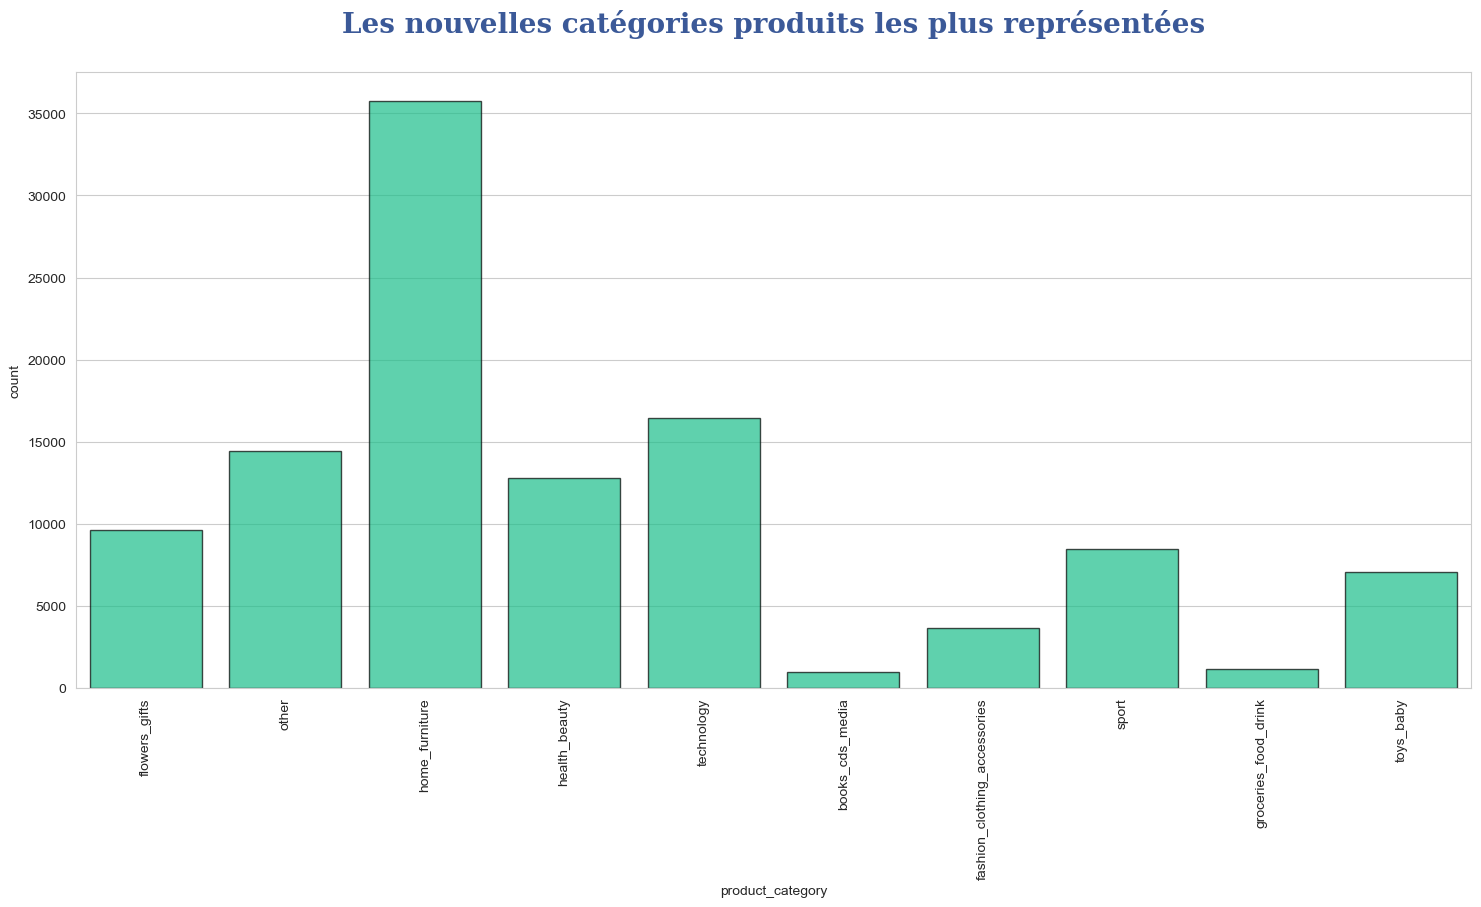

In [45]:
# Plot categories count in dataset
fig = plt.figure(figsize=(18, 8))
sns.countplot(data=data, x="product_category",
              edgecolor="black",
              color="#00d994", alpha=0.7)
plt.xticks(range(0, data["product_category"].nunique()),
           data["product_category"].unique(),
           rotation=90)
plt.title(f"Les nouvelles catégories produits les plus représentées\n",
          fontdict=font_title)
plt.show()

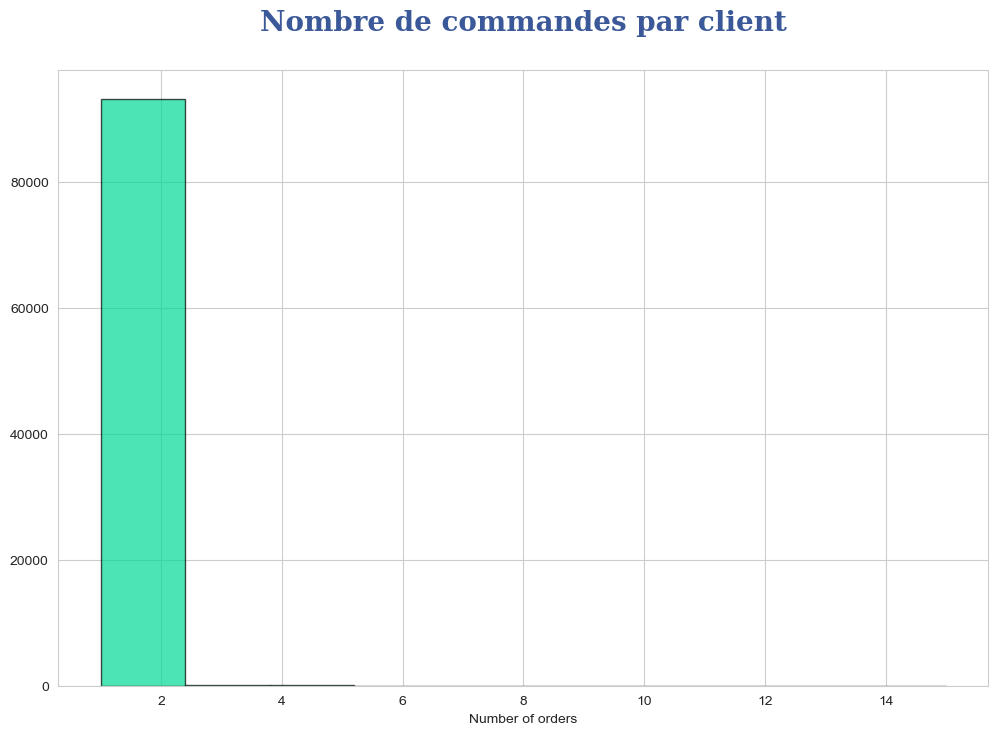

In [46]:
# Répartition du nombre de commandes moyen par client
fig = plt.figure(figsize=(12, 8))
plt.hist(data.groupby("customer_unique_id").agg({"order_id": "nunique"}),
             edgecolor="black",
             color="#00d994", alpha=0.7)
plt.xlabel("Number of orders")
plt.title(f"Nombre de commandes par client\n",
          fontdict=font_title)
plt.show()

**Commentaires - Implication :**  
La majeure partie des clients n'ont passé qu'une seule commande. Il sera donc compliqué d'établir un classement de leur catégorie produit préférée. Nous allons donc créer une variable par catégorie produit pour y dispatcher le nombre de produits achetés sur les commandes passées. Ensuite, nous calculerons le ratio du nombre de produits par catégorie sur le nombre de produits total acheté par le client.

In [47]:
categories_customers = data.groupby(["customer_unique_id", "product_category"])\
                        .agg({"order_item_id": "count"}).unstack()
categories_customers.columns = categories_customers.columns.droplevel(0)
categories_customers.fillna(0, inplace=True)
categories_customers["total_items"] = categories_customers.sum(axis=1)

# ratio du nombre de produits par catégorie sur le nbre de produits total acheté
for col in categories_customers.columns:
    if (col != "total_items"):
        categories_customers[col] = (categories_customers[col]/categories_customers["total_items"])

categories_customers.reset_index(inplace=True)
categories_customers.head(5)

product_category,customer_unique_id,books_cds_media,fashion_clothing_accessories,flowers_gifts,groceries_food_drink,health_beauty,home_furniture,other,sport,technology,toys_baby,total_items
0,0000366f3b9a7992bf8c76cfdf3221e2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0000f46a3911fa3c0805444483337064,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0000f6ccb0745a6a4b88665a16c9f078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0004aac84e0df4da2b147fca70cf8255,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


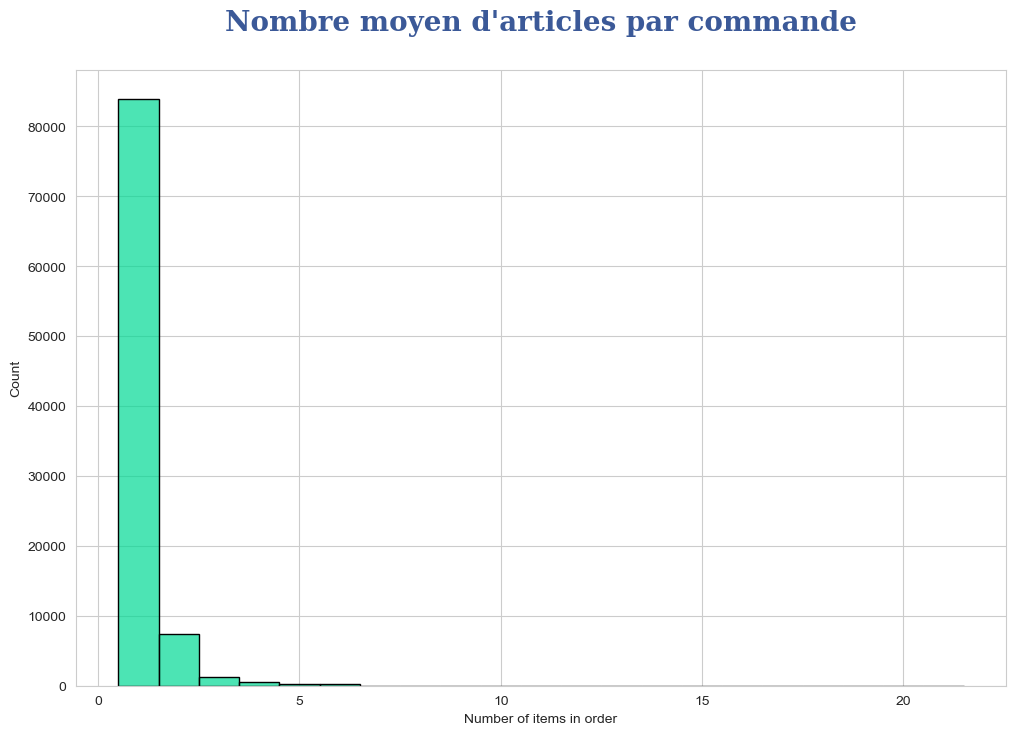

In [48]:
# Nombre moyen d'articles par commande pour chaque client
products_per_order = data.groupby(["customer_unique_id", "order_id"])\
                        .agg({"order_item_id": "count"})
products_per_order = products_per_order.groupby("customer_unique_id")\
                        .agg({"order_item_id": "mean"})

# Nombre moyen d'articles par commande
fig = plt.figure(figsize=(12, 8))
sns.histplot(data = products_per_order,
             x="order_item_id",
             discrete=True,
             edgecolor="black",
             color="#00d994", alpha=0.7)
plt.xlabel("Number of items in order")
plt.title(f"Nombre moyen d'articles par commande\n",
          fontdict=font_title)
plt.show()

In [49]:
#Le nombre de jours écoulés entre la première et la dernière commande
# 
recurencies = data.groupby("customer_unique_id")\
                .agg({"order_purchase_timestamp": ["min","max"]})
recurencies.columns = recurencies.columns.droplevel(0)

# Date maximale dans la base de données
max_date = data["order_purchase_timestamp"].max()

# Retard depuis la dernière commande
recurencies["order_total_delay"] = [(y[1] - y[0]).round('1d').days if y[1] != y[0] 
                                    else (max_date - y[0]).round('1d').days 
                                    for x,y in recurencies.iterrows()]
recurencies.drop(["min", "max"], axis=1, inplace=True)
recurencies.head(5)

C:\Users\Cifope 254\AppData\Local\Temp\ipykernel_9156\1686030442.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  recurencies["order_total_delay"] = [(y[1] - y[0]).round('1d').days if y[1] != y[0]
C:\Users\Cifope 254\AppData\Local\Temp\ipykernel_9156\1686030442.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  else (max_date - y[0]).round('1d').days


,order_total_delay
customer_unique_id,
0000366f3b9a7992bf8c76cfdf3221e2,111
0000b849f77a49e4a4ce2b2a4ca5be3f,114
0000f46a3911fa3c0805444483337064,537
0000f6ccb0745a6a4b88665a16c9f078,321
0004aac84e0df4da2b147fca70cf8255,288


### Création du dataset clients

In [50]:
# Regroupement des données selon les clients
data = data.groupby("customer_unique_id")\
            .agg({"order_id": "nunique",
                  "price": "sum",
                  "freight_value": "sum",
                  "nb_payment_sequential": "mean", 
                  "sum_payment_installments": "mean", 
                  "review_score": "mean",
                  "delivery_delta_days": "mean",
                  "sale_month": lambda x:x.value_counts().index[0]})

# On renomme les variables
data = data.rename(columns={"order_id": "nb_orders",
                            "price": "total_spend",
                            "freight_value": "total_freight",
                            "nb_payment_sequential": "mean_payment_sequential",
                            "sum_payment_installments": "mean_payment_installments",
                            "review_score": "mean_review_score",
                            "delivery_delta_days": "mean_delivery_days",
                            "sale_month": "favorite_sale_month"})

# Fusion avec les variables crées précedemment
data = pd.merge(data, categories_customers,
                how="left",
                on="customer_unique_id")

data = pd.merge(data, products_per_order,
                how="left",
                on="customer_unique_id")\
        .rename(columns={"order_item_id": "mean_nb_items"})

data = pd.merge(data, recurencies,
                how="left",
                on="customer_unique_id")

data.head(5)

,customer_unique_id,nb_orders,total_spend,total_freight,mean_payment_sequential,mean_payment_installments,mean_review_score,mean_delivery_days,favorite_sale_month,books_cds_media,...,groceries_food_drink,health_beauty,home_furniture,other,sport,technology,toys_baby,total_items,mean_nb_items,order_total_delay
0,0000366f3b9a7992bf8c76cfdf3221e2,1,129.90,12.00,1.0,8.0,5.0,6.0,5,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,111
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,18.90,8.29,1.0,1.0,4.0,3.0,5,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,114
2,0000f46a3911fa3c0805444483337064,1,69.00,17.22,1.0,8.0,3.0,26.0,3,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,537
3,0000f6ccb0745a6a4b88665a16c9f078,1,25.99,17.63,1.0,4.0,4.0,20.0,10,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,321
4,0004aac84e0df4da2b147fca70cf8255,1,180.00,16.89,1.0,6.0,5.0,13.0,11,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,288


In [51]:
# Calcul du délais des commandes client en fonction du nombre de commandes 
# Ceci permet d'obtenir le délai moyen entre plusieurs achats
data["order_total_delay"] = data["order_total_delay"] / data["nb_orders"]
data = data.rename(columns={"order_total_delay": "order_mean_delay"})

In [52]:
# Calcul du ratio fret / total commande
data["freight_ratio"] = round(data["total_freight"] / (data["total_spend"] + data["total_freight"]),2)
# calcul du prix moyen par commande
data["mean_price_order"] = round(data["total_spend"] / data["nb_orders"],2)
data["total_spend"] = (data["total_spend"] + data["total_freight"])
data.drop("total_freight", axis=1, inplace=True)

In [53]:
# Ajout des données de localisation
customers.drop("customer_id", axis=1, inplace=True)
# 
customers_info = customers.groupby("customer_unique_id").agg(lambda x:x.value_counts().index[0])
data = pd.merge(data, customers_info,
                how="left",
                on="customer_unique_id")

<h1 style="border: thick double #32a1ce; text-align:center;box-shadow: 12px 12px 2px 1px rgba(0, 0, 255, .2);border-radius:35px">
3. Cleaning du dataset client
</h1>

In [54]:
data.head(5)

,customer_unique_id,nb_orders,total_spend,mean_payment_sequential,mean_payment_installments,mean_review_score,mean_delivery_days,favorite_sale_month,books_cds_media,fashion_clothing_accessories,...,technology,toys_baby,total_items,mean_nb_items,order_mean_delay,freight_ratio,mean_price_order,customer_zip_code_prefix,customer_city,customer_state
0,0000366f3b9a7992bf8c76cfdf3221e2,1,141.90,1.0,8.0,5.0,6.0,5,0.0,0.0,...,0.0,0.0,1.0,1.0,111.0,0.08,129.90,7787,cajamar,SP
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,27.19,1.0,1.0,4.0,3.0,5,0.0,0.0,...,0.0,0.0,1.0,1.0,114.0,0.30,18.90,6053,osasco,SP
2,0000f46a3911fa3c0805444483337064,1,86.22,1.0,8.0,3.0,26.0,3,0.0,0.0,...,0.0,0.0,1.0,1.0,537.0,0.20,69.00,88115,sao jose,SC
3,0000f6ccb0745a6a4b88665a16c9f078,1,43.62,1.0,4.0,4.0,20.0,10,0.0,0.0,...,1.0,0.0,1.0,1.0,321.0,0.40,25.99,66812,belem,PA
4,0004aac84e0df4da2b147fca70cf8255,1,196.89,1.0,6.0,5.0,13.0,11,0.0,0.0,...,1.0,0.0,1.0,1.0,288.0,0.09,180.00,18040,sorocaba,SP


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93358 entries, 0 to 93357
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_unique_id            93358 non-null  object 
 1   nb_orders                     93358 non-null  int64  
 2   total_spend                   93358 non-null  float64
 3   mean_payment_sequential       93357 non-null  float64
 4   mean_payment_installments     93357 non-null  float64
 5   mean_review_score             92755 non-null  float64
 6   mean_delivery_days            93350 non-null  float64
 7   favorite_sale_month           93358 non-null  int32  
 8   books_cds_media               93358 non-null  float64
 9   fashion_clothing_accessories  93358 non-null  float64
 10  flowers_gifts                 93358 non-null  float64
 11  groceries_food_drink          93358 non-null  float64
 12  health_beauty                 93358 non-null  float64
 13  h

**Note :**  
3 variables contiennent des valeurs nulles. Nous allons Imputer par le mode.

### Imputation par le mode

In [56]:
# Recherche des variables à imputer
var_impute = data.isnull().sum()
var_impute = list(var_impute[var_impute.values > 0].index)

for f in var_impute:
    data[f] = data[f].fillna(data[f].mode()[0])
    print(f, data[f].mode()[0])

mean_payment_sequential 1.0
mean_payment_installments 1.0
mean_review_score 5.0
mean_delivery_days 7.0


In [57]:
data.describe()

,nb_orders,total_spend,mean_payment_sequential,mean_payment_installments,mean_review_score,mean_delivery_days,favorite_sale_month,books_cds_media,fashion_clothing_accessories,flowers_gifts,...,other,sport,technology,toys_baby,total_items,mean_nb_items,order_mean_delay,freight_ratio,mean_price_order,customer_zip_code_prefix
count,93358.000000,93358.000000,93358.000000,93358.000000,93358.000000,93358.000000,93358.000000,93358.000000,93358.000000,93358.000000,...,93358.000000,93358.000000,93358.000000,93358.000000,93358.000000,93358.000000,93358.000000,93358.000000,93358.000000,93358.000000
mean,1.033420,165.168210,1.043872,2.965951,4.158806,12.524327,6.034759,0.009085,0.034082,0.094412,...,0.133696,0.077026,0.152034,0.068452,1.180370,1.139531,232.502018,0.208141,137.508262,35243.998340
std,0.209097,226.292101,0.364435,2.717719,1.278290,9.550578,3.226430,0.094527,0.180035,0.290952,...,0.338181,0.265228,0.357663,0.251017,0.620857,0.527075,154.187659,0.124892,209.860281,29843.212881
min,1.000000,9.590000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.850000,1003.000000
25%,1.000000,63.010000,1.000000,1.000000,4.000000,7.000000,3.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,108.000000,0.120000,46.000000,11410.000000
50%,1.000000,107.780000,1.000000,2.000000,5.000000,10.000000,6.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,212.000000,0.180000,86.990000,24455.000000
75%,1.000000,182.510000,1.000000,4.000000,5.000000,16.000000,8.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,342.000000,0.270000,149.900000,59075.000000
max,15.000000,13664.080000,26.000000,26.000000,5.000000,210.000000,12.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,24.000000,21.000000,713.000000,0.960000,13440.000000,99980.000000


**Note:**  
Une commande est chiffrée à plus de 13 000 dollars.

In [58]:
# Vérification de la commande à plus de 13000 dollars
data[data["mean_price_order"] == data["mean_price_order"].max()]

,customer_unique_id,nb_orders,total_spend,mean_payment_sequential,mean_payment_installments,mean_review_score,mean_delivery_days,favorite_sale_month,books_cds_media,fashion_clothing_accessories,...,technology,toys_baby,total_items,mean_nb_items,order_mean_delay,freight_ratio,mean_price_order,customer_zip_code_prefix,customer_city,customer_state
3724,0a0a92112bd4c708ca5fde585afaa872,1,13664.08,1.0,1.0,1.0,18.0,9,0.0,0.0,...,1.0,0.0,8.0,8.0,334.0,0.02,13440.0,20080,rio de janeiro,RJ


**Note :**  
Cette commande contient 8 articles technologiques pour un montant de 13 000 dollars. C'est atypique certes, mais ce n'est pas pour autant une donnée abérrante. Nous la conservons donc.

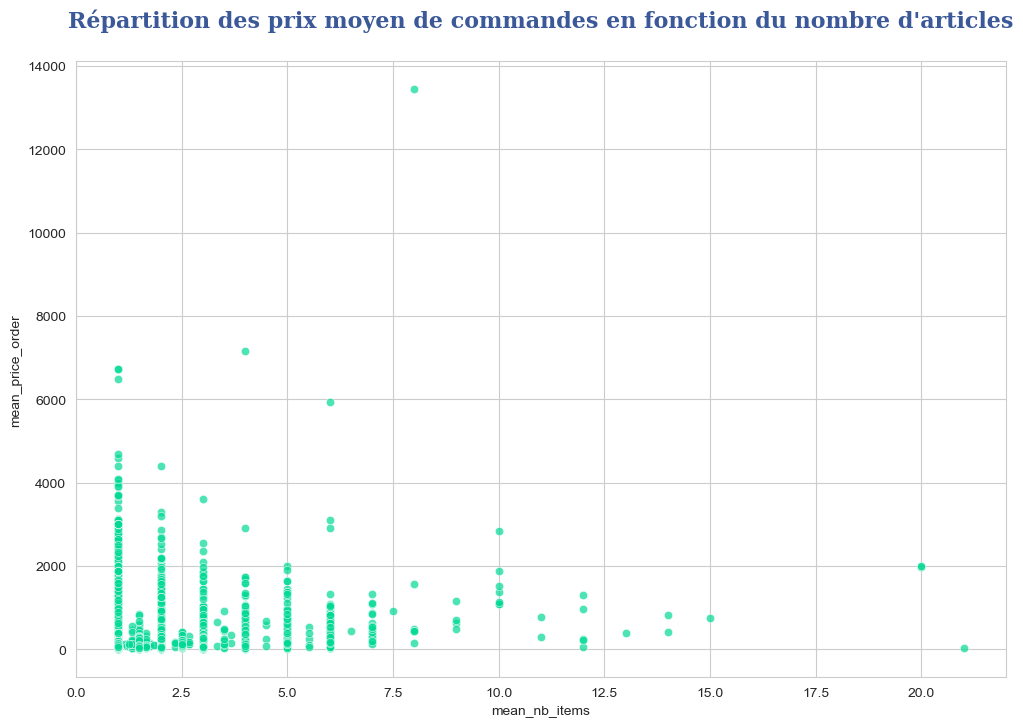

In [59]:
#la dispersion des montants moyen de commandes en fonction du nombre d'articles
fig = plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, y="mean_price_order", x="mean_nb_items",
                color="#00d994", alpha=0.7)
plt.title(f"Répartition des prix moyen de commandes en fonction du nombre d'articles\n",
          fontdict=font_title, fontsize=16)
plt.show()

**Note :**  
Une commande de plus de 20 articles est affichée pour une somme de prêt de 0

In [60]:
# Verification de la commande de plus de 20 articles
data[data["mean_nb_items"] > 20]

,customer_unique_id,nb_orders,total_spend,mean_payment_sequential,mean_payment_installments,mean_review_score,mean_delivery_days,favorite_sale_month,books_cds_media,fashion_clothing_accessories,...,technology,toys_baby,total_items,mean_nb_items,order_mean_delay,freight_ratio,mean_price_order,customer_zip_code_prefix,customer_city,customer_state
25309,4546caea018ad8c692964e3382debd19,1,196.17,1.0,2.0,1.0,15.0,7,0.0,0.0,...,0.0,0.0,21.0,21.0,409.0,0.84,31.8,5882,sao paulo,SP


**Note :**
Cette fois encore, c'est une valeur atypique mais pas abérrante.

### Analyse des Etats

In [61]:
data["customer_state"].unique()

array(['SP', 'SC', 'PA', 'PR', 'RJ', 'MA', 'ES', 'RS', 'MG', 'GO', 'DF',
       'BA', 'MT', 'SE', 'TO', 'PE', 'CE', 'AL', 'AC', 'PI', 'PB', 'RN',
       'AM', 'MS', 'AP', 'RO', 'RR'], dtype=object)

**Note :**  
Les codes états ne sont pas très parlant. Nous allons donc utiliser Wikipedia pour modifier les codes états par leur nom.

In [66]:
wiki_url = "https://en.wikipedia.org/wiki/Federative_units_of_Brazil"

tables = pd.read_html(wiki_url)

states_table = tables[3].set_index("Code")

states_table.head()

,Flag and name,Capital,Largest city,Area (km2)[20],Population (May 2023)[21],"Density (per km2, 2022)","GDP (R$ millions, 2022)[22]",HDI (2022)[23]
Code,,,,,,,,
AC,Acre,Rio Branco,Rio Branco,164123,830018,6.34,21000,0.719
AL,Alagoas,Maceió,Maceió,27779,3127683,125.52,73000,0.683
AP,Amapá,Macapá,Macapá,142829,733759,2.63,9000,0.740
AM,Amazonas,Manaus,Manaus,1559159,3941613,2.58,103000,0.733
BA,Bahia,Salvador,Salvador,564733,14141626,30.52,257000,0.714


In [67]:
data = pd.merge(data.reset_index(), states_table[["Flag and name"]],
                how="left",
                left_on="customer_state",
                right_on="Code")
data.drop("customer_state", axis=1, inplace=True)
data = data.rename(columns={"Flag and name": "customer_state"})

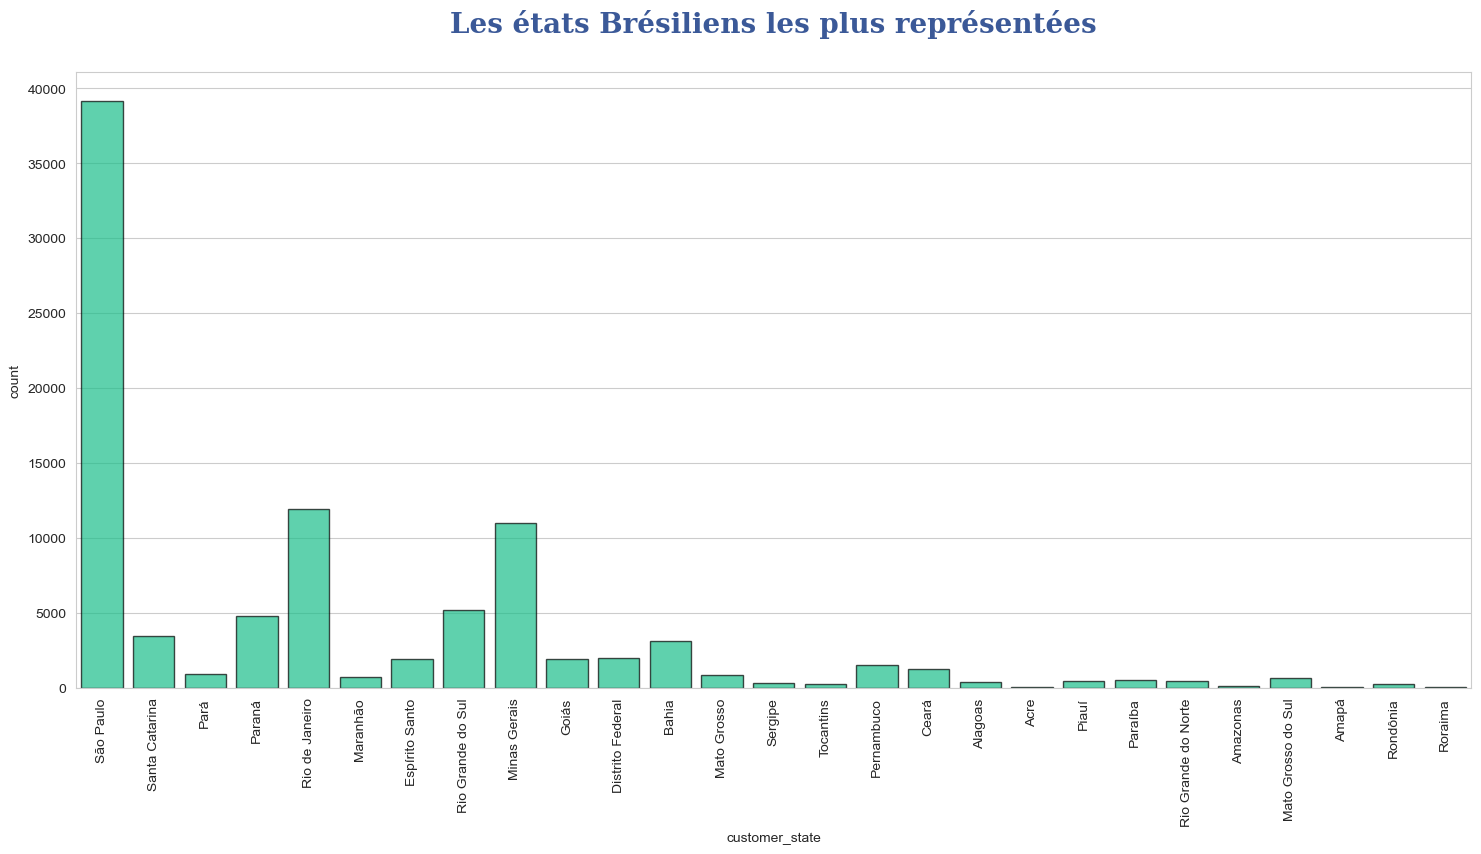

In [68]:
# Repartition des Etats brésiliens
fig = plt.figure(figsize=(18, 8))
sns.countplot(data=data, x="customer_state",
              edgecolor="black",
              color="#00d994", alpha=0.7)
plt.xticks(range(0, data["customer_state"].nunique()),
           data["customer_state"].unique(),
           rotation=90)
plt.title(f"Les états Brésiliens les plus représentées\n",
          fontdict=font_title)
plt.show()

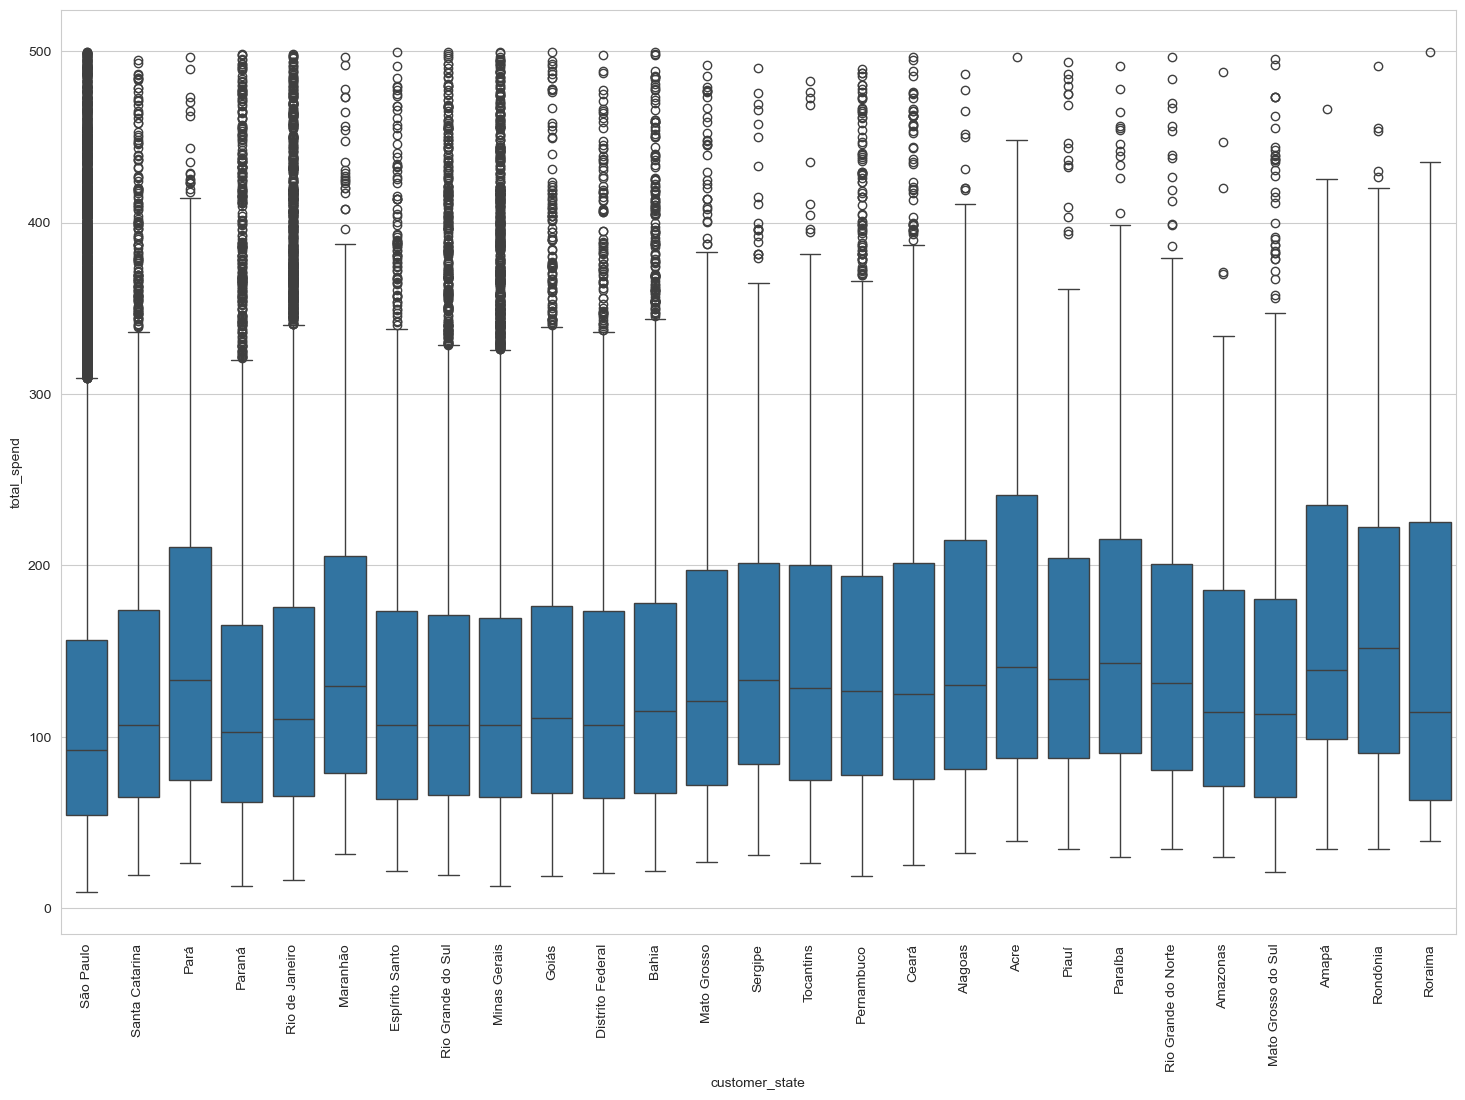

In [69]:
# Boxplots des dépenses totales par Etat
fig = plt.figure(figsize=(18,12))
sns.boxplot(x="customer_state", y="total_spend", 
            data=data[data["total_spend"]<500])
plt.xticks(rotation=90)
plt.show()

**Note :**  
* On voit dans ces boxplots que l'état du client a un impact faible sur les variances et médianes des dépenses sur le site.
* Afin d'utiliser une variable de localisation encodable sans impact négatif sur nos modélisation, nous allons calculer la distance Haversine entre l'état du client (moyenne des latitudes et longitudes de l'état) et le siège de Olist

In [72]:
state_location = geolocation.groupby("geolocation_state")[["geolocation_lat", "geolocation_lng"]].mean().reset_index()
state_location = pd.merge(states_table[["Flag and name"]].reset_index(), 
                          state_location, 
                          right_on="geolocation_state", 
                          left_on="Code", 
                          how="left")
state_location = state_location[["Flag and name", "geolocation_lat", "geolocation_lng"]]

# localisation de Olist
olist_lat = -25.43045
olist_lon = -49.29207

In [73]:
def haversine_distance(lat1, lng1, lat2, lng2, degrees=True):
    r = 3956 # rayon de la Terre en miles
    
    if degrees:
        lat1, lng1, lat2, lng2 = map(radians, [lat1, lng1, lat2, lng2])
    
    # Formule Haversine
    dlng = lng2 - lng1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlng/2)**2
    d = 2 * r * asin(sqrt(a))  

    return d

In [74]:
# Calcul de la distance Haversine entre centre state et Olist office
state_location['harvesine_distance'] = [haversine_distance(olist_lat, olist_lon, x, y) 
                              for x, y in zip(state_location.geolocation_lat, 
                                              state_location.geolocation_lng)]

In [75]:
data = pd.merge(data, state_location[["Flag and name", "harvesine_distance"]],
         how="left",
         left_on="customer_state",
         right_on="Flag and name")
data.drop("index", axis=1, inplace=True)
data.set_index("customer_unique_id", inplace=True)
data.head(5)

,nb_orders,total_spend,mean_payment_sequential,mean_payment_installments,mean_review_score,mean_delivery_days,favorite_sale_month,books_cds_media,fashion_clothing_accessories,flowers_gifts,...,total_items,mean_nb_items,order_mean_delay,freight_ratio,mean_price_order,customer_zip_code_prefix,customer_city,customer_state,Flag and name,harvesine_distance
customer_unique_id,,,,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,1,141.90,1.0,8.0,5.0,6.0,5,0.0,0.0,0.0,...,1.0,1.0,111.0,0.08,129.90,7787,cajamar,São Paulo,São Paulo,209.713834
0000b849f77a49e4a4ce2b2a4ca5be3f,1,27.19,1.0,1.0,4.0,3.0,5,0.0,0.0,0.0,...,1.0,1.0,114.0,0.30,18.90,6053,osasco,São Paulo,São Paulo,209.713834
0000f46a3911fa3c0805444483337064,1,86.22,1.0,8.0,3.0,26.0,3,0.0,0.0,0.0,...,1.0,1.0,537.0,0.20,69.00,88115,sao jose,Santa Catarina,Santa Catarina,125.363853
0000f6ccb0745a6a4b88665a16c9f078,1,43.62,1.0,4.0,4.0,20.0,10,0.0,0.0,0.0,...,1.0,1.0,321.0,0.40,25.99,66812,belem,Pará,Pará,1574.231129
0004aac84e0df4da2b147fca70cf8255,1,196.89,1.0,6.0,5.0,13.0,11,0.0,0.0,0.0,...,1.0,1.0,288.0,0.09,180.00,18040,sorocaba,São Paulo,São Paulo,209.713834


### Analyse des corrélations

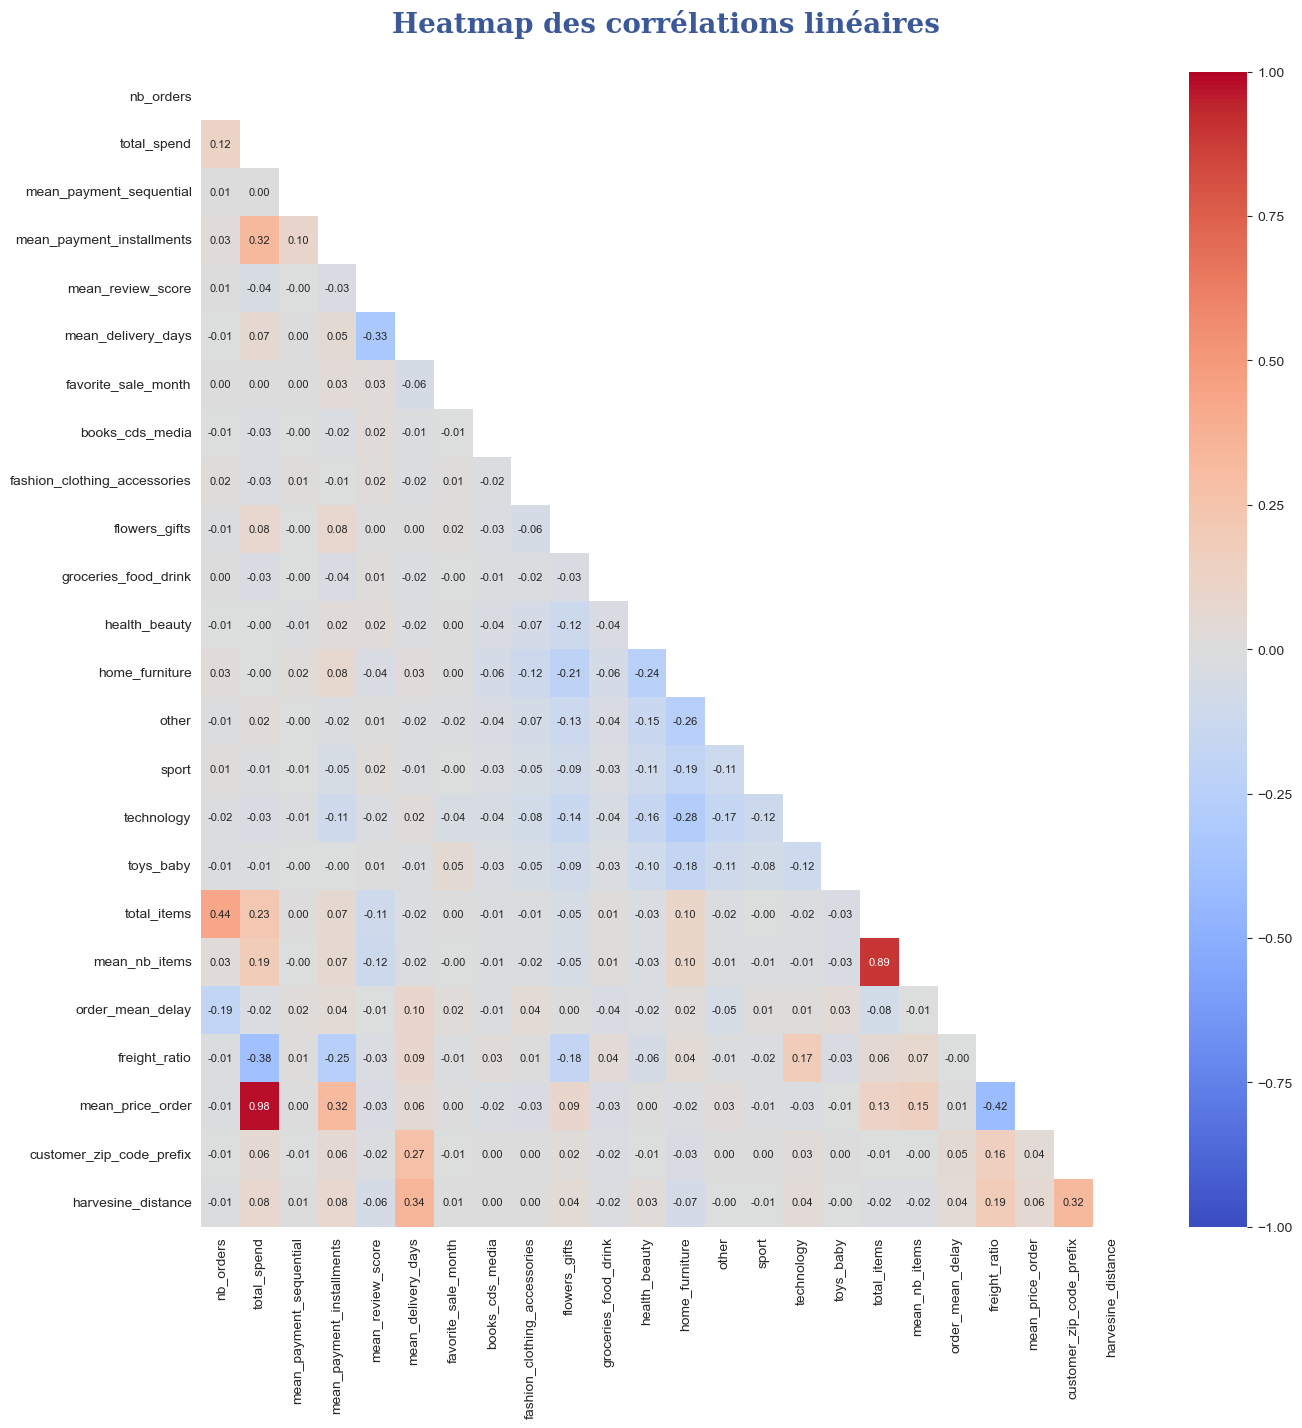

In [77]:
# Sélection des colonnes quantitatives
quantitative_data = data.select_dtypes(include=[np.number])

corr = quantitative_data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(corr, annot=True,
                 vmin=-1, vmax=1,
                 fmt=".2f", annot_kws={'size':8}, 
                 mask=mask, 
                 center=0, 
                 cmap="coolwarm")
plt.title(f"Heatmap des corrélations linéaires\n", 
          fontdict=font_title)
plt.show()

**Note :**  
On remarque que le prix total est très fortement corrélé au prix moyen par commande (idem pour le nombre d'articles moyen et le nombre d'articles total). Cela est dû au fait que la majorité des clients n'ont commandé qu'une seule fois. Cette variable sera donc moins corrélée au fil du temps.

### Exportation de la base finale pour classification non-supervisée

In [78]:
data.to_csv("olist-customers-segmentation.csv")